In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [9]:
df = pd.read_csv("updated_dataset.csv")
df.head()

,index,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount,local_image_path
0,100000,Farfetch,2023-11-17,MAC,HKD,MARQUES'ALMEIDA,CLOTHING,DRESSES,DAY DRESSES,19908319,Graffiti-print ruched mesh dress,http://www.farfetch.com/mo/shopping/women/marq...,https://cdn-images.farfetch-contents.com/19/90...,3852.0,3852.0,455.37,455.37,0,images/d19bc46963b0a3cba3b8bdf3cb2d0b67.jpg
1,100001,Farfetch,2023-11-17,MAC,HKD,VALENTINO GARAVANI,CLOTHING,PANTS,REGULAR-FIT & STRAIGHT LEG PANTS,19660972,Rockstud-embellished cargo trousers,http://www.farfetch.com/mo/shopping/men/valent...,https://cdn-images.farfetch-contents.com/19/66...,16800.0,10080.0,1986.05,1191.63,1,images/b32e184205b900e69ff0586c85d79181.jpg
2,100002,Farfetch,2023-11-17,MAC,HKD,ELISABETTA FRANCHI,CLOTHING,KNITS,KNITTED TOPS,21506295,roll neck crop top,http://www.farfetch.com/mo/shopping/women/elis...,https://cdn-images.farfetch-contents.com/21/50...,3571.0,3571.0,422.15,422.15,0,images/1fa7514996addde09e74b1839c51aa22.jpg
3,100003,Farfetch,2023-11-17,MAC,HKD,CASHMERE IN LOVE,CLOTHING,KNITS,KNITTED TROUSERS,12255754,cashmere Candiss flared knit trousers,http://www.farfetch.com/mo/shopping/women/cash...,https://cdn-images.farfetch-contents.com/12/25...,2556.0,2556.0,302.16,302.16,0,images/2bb91b55057cf2b16089e3e57c4a9708.jpg
4,100004,Farfetch,2023-11-17,MAC,HKD,HACKETT,CLOTHING,POLO SHIRTS,NaN,20191459,logo-embroidered cotton polo shirt,http://www.farfetch.com/mo/shopping/men/hacket...,https://cdn-images.farfetch-contents.com/20/19...,1538.0,1538.0,181.81,181.81,0,images/733796a55e7e83826c18a5c07d339b5e.jpg


In [10]:
cols = ['title', 'full_price', 'brand', 'imageurl', 'itemurl', 'local_image_path']

df = df[cols]
df.head()

,title,full_price,brand,imageurl,itemurl,local_image_path
0,Graffiti-print ruched mesh dress,3852.0,MARQUES'ALMEIDA,https://cdn-images.farfetch-contents.com/19/90...,http://www.farfetch.com/mo/shopping/women/marq...,images/d19bc46963b0a3cba3b8bdf3cb2d0b67.jpg
1,Rockstud-embellished cargo trousers,16800.0,VALENTINO GARAVANI,https://cdn-images.farfetch-contents.com/19/66...,http://www.farfetch.com/mo/shopping/men/valent...,images/b32e184205b900e69ff0586c85d79181.jpg
2,roll neck crop top,3571.0,ELISABETTA FRANCHI,https://cdn-images.farfetch-contents.com/21/50...,http://www.farfetch.com/mo/shopping/women/elis...,images/1fa7514996addde09e74b1839c51aa22.jpg
3,cashmere Candiss flared knit trousers,2556.0,CASHMERE IN LOVE,https://cdn-images.farfetch-contents.com/12/25...,http://www.farfetch.com/mo/shopping/women/cash...,images/2bb91b55057cf2b16089e3e57c4a9708.jpg
4,logo-embroidered cotton polo shirt,1538.0,HACKETT,https://cdn-images.farfetch-contents.com/20/19...,http://www.farfetch.com/mo/shopping/men/hacket...,images/733796a55e7e83826c18a5c07d339b5e.jpg


In [11]:
df.isna().sum()

title               0
full_price          0
brand               0
imageurl            0
itemurl             0
local_image_path    5
dtype: int64

In [12]:
df = df.dropna(subset="local_image_path")
df.isna().sum()

title               0
full_price          0
brand               0
imageurl            0
itemurl             0
local_image_path    0
dtype: int64

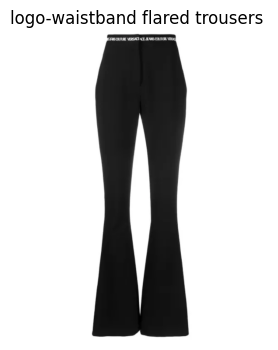

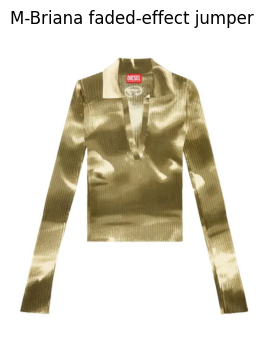

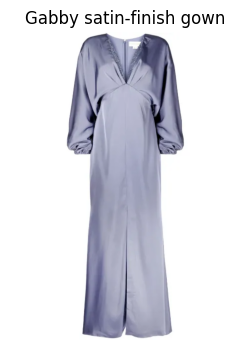

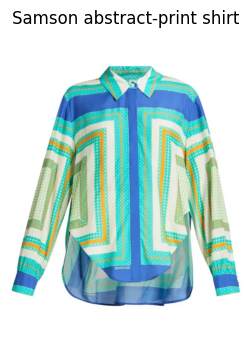

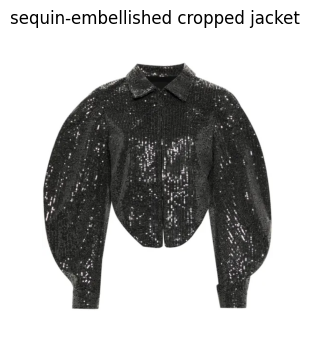

In [13]:
samples = df.sample(5, random_state=42)

# Show them
for i, row in samples.iterrows():
    img_path = row['local_image_path']
    
    if os.path.exists(img_path):
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis("off")
        plt.title(row["title"])
        plt.show()

# convert HKD into USD

In [6]:
def hkd_to_usd(price_hkd, rate=0.128):
    return price_hkd * rate

df['full_price'] = df['full_price'].apply(hkd_to_usd)

In [7]:
import requests
def url_to_image(url):
    resp = requests.get(url, timeout=10)
    img_array = np.frombuffer(resp.content, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img  # BGR image

## Adding Color Feature to the DataSet

In [17]:
import cv2
import numpy as np
import webcolors
from sklearn.cluster import KMeans
import pandas as pd


def closest_color(rgb_tuple):
    min_diff = float('inf')
    closest_name = None
    for name, hex_val in webcolors.CSS3_NAMES_TO_HEX.items():
        r, g, b = webcolors.hex_to_rgb(hex_val)
        diff = (r - rgb_tuple[0]) ** 2 + (g - rgb_tuple[1]) ** 2 + (b - rgb_tuple[2]) ** 2
        if diff < min_diff:
            min_diff = diff
            closest_name = name
    return closest_name


# def extract_top_colors(image_path, n_clusters=4, top_n=2):
#     try:
#         img = cv2.imread(image_path)
#         if img is None:
#             return ["Image not found!"] * top_n

#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (100, 100))
#         img = img.reshape(-1, 3)

#         kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
#         labels = kmeans.fit_predict(img)


#         counts = np.bincount(labels)

#         top_idx = counts.argsort()[::-1][:top_n]
#         colors = kmeans.cluster_centers_[top_idx].astype(int)

#         color_names = [closest_color(tuple(c)) for c in colors]
#         return color_names
#     except Exception as e:
#         return [f"Error: {e}"] * top_n


# # مثال على الاستخدام
# df["top_colors"] = df["imageurl"].apply(
#     lambda x: extract_top_colors(x, n_clusters=4, top_n=2)
# )

In [18]:
def extract_top_colors(image_input, n_clusters=4, top_n=2):
    try:
        # check if input is URL or already an image array
        if isinstance(image_input, str) and image_input.startswith('http'):
            img = url_to_image(image_input)
        elif isinstance(image_input, str):  # local file path
            img = cv2.imread(image_input)
        else:  # already a numpy array
            img = image_input

        if img is None:
            return ["Image not found!"] * top_n

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (100, 100))
        img = img.reshape(-1, 3)

        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(img)

        counts = np.bincount(labels)
        top_idx = counts.argsort()[::-1][:top_n]
        colors = kmeans.cluster_centers_[top_idx].astype(int)

        color_names = [closest_color(tuple(c)) for c in colors]
        return color_names
    except Exception as e:
        return [f"Error: {e}"] * top_n


In [ ]:
df["top_colors"] = df["imageurl"].apply(
    lambda x: extract_top_colors(x, n_clusters=4, top_n=2)
)

In [ ]:
df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
df.to_csv("dataset.csv", index=False)